In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data

In [18]:
fruitsb=pd.read_table('fruit_data_with_colors.txt')
fruitsb
fruits = fruitsb.dropna(how='any',axis=0)
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [5]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [6]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


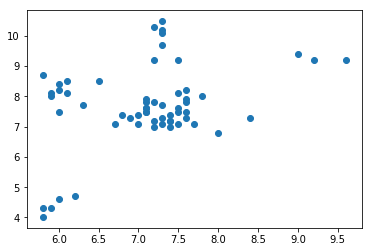

In [7]:
plt.scatter(fruits['width'],fruits['height'])

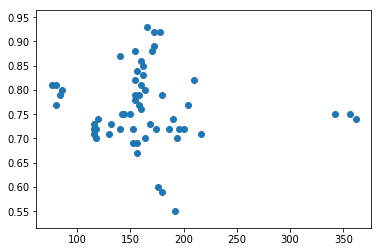

In [8]:
plt.scatter(fruits['mass'],fruits['color_score'])

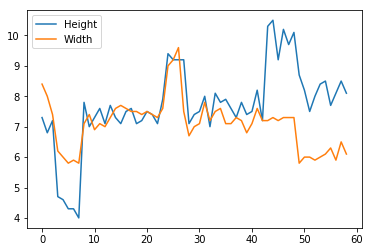

In [9]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [12]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [14]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5333333333333333

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6


In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6
